In [1]:
#Import essential libraries
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import json
import time
import math
import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline

# Data Gathering

In [2]:
# Twitter archive data
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df .head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Image predictions data programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
   file.write(response.content)    
image_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# Twitter API data for retweet & fav counts # Declare Twitter API keys and access tokens

consumer_key = 'XXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
#Extract based in tweet id 
extract_tweet=api.get_status(archive.tweet_id[210],tweet_mode='extended')
content=extract_tweet._json
content

NameError: name 'archive' is not defined

In [6]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

NameError: name 'df_1' is not defined

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [8]:
#trial2 to get data another way from discourse 
extract_tweet.full_text

NameError: name 'extract_tweet' is not defined

In [9]:
#trial3 to get data another way from discourse 
extract_tweet.retweet_count,extract_tweet.id,extract_tweet.favorite_count

NameError: name 'extract_tweet' is not defined

In [10]:
#test key of specific tweet
content.keys()

NameError: name 'content' is not defined

In [11]:
#check retweet & fav counts
content['retweet_count'],content['id'],content['favorite_count']

NameError: name 'content' is not defined

In [ ]:
#check user info
content['user'].keys()

In [ ]:
#additional info
content['user']['followers_count'],content['user']['location']

In [ ]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
#Note to save time initially i didn't run above code just Accessing Project Data Without a Twitter Account however previous section was for inisghts to rerun it later  after project submission to learn more
# Read tweet's JSON data line by line
tweets=[]
with open('tweet-json.txt','r') as file:
    for line in file:
        tweet=json.loads(line)
        tweets.append(tweet)
        
tweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [5]:
type(tweets[0])

dict

In [6]:
#Reading JSON content as df
tweets_df = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In [7]:
tweets_df.head ()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [8]:
# Convert to a DataFrame
api_df = pd.DataFrame()

# Create a DataFrame with tweet ID, retweet count, favorite count 
api_df['id']=list(map(lambda tweet: tweet['id'],tweets))
api_df['retweet_count']=list(map(lambda tweet: tweet['retweet_count'],tweets))
api_df['favorite_count']=list(map(lambda tweet: tweet['favorite_count'],tweets))
api_df['followers_count']=list(map(lambda tweet: tweet['user']['followers_count'],tweets))

# Assess Data 

In [9]:
#Display data caprured from data frame 
api_df.head()

,id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [10]:
#Sample from tweet achive data frame
archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2121,670408998013820928,NaN,NaN,2015-11-28 01:08:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peanut. He was the World Table Tennis ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670408998...,10,10,Peanut,None,None,None,None
1344,704499785726889984,NaN,NaN,2016-03-01 02:53:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you wake up from a long nap and have no i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704499785...,12,10,None,None,None,None,None
1422,698178924120031232,NaN,NaN,2016-02-12 16:16:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lily. She accidentally dropped all her...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698178924...,10,10,Lily,None,None,None,None
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate polar bears but this one...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845812042...,13,10,None,None,None,None,None
1780,677700003327029250,NaN,NaN,2015-12-18 04:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralph. He's an interpretive dancer. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677700003...,10,10,Ralph,None,None,None,None
2223,668297328638447616,NaN,NaN,2015-11-22 05:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",2 rare dogs. They waddle (v inefficient). Some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668297328...,9,10,None,None,None,None,None
1213,715220193576927233,NaN,NaN,2016-03-30 16:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nico. His selfie game is strong af. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715220193...,10,10,Nico,None,None,None,None
2132,670079681849372674,NaN,NaN,2015-11-27 03:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fabio. He's a wonderful pup. Can't stay a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670079681...,10,10,Fabio,None,None,None,None
1284,708479650088034305,NaN,NaN,2016-03-12 02:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bear. He's a Beneboop Cumberclap. Extreme...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708479650...,13,10,Bear,None,None,None,None
871,761599872357261312,NaN,NaN,2016-08-05 16:28:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Sephie. According to this picture, she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/761599872...,11,10,Sephie,None,None,None,None


In [11]:
#tweet achive metadata
archive_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Check retweets in archive_df 
len(archive_df[archive_df.retweeted_status_id.isnull() == False])

181

In [13]:
# Sort by rating_numerator
archive_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [14]:
# Sort by rating_denominator 
archive_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [15]:
archive_df.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [16]:
archive_df.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [17]:
# DQ Issue 1 Capturing dog tagging for doggo and floofer at the same time 
len(archive_df[(archive_df.doggo != 'None') & (archive_df.floofer != 'None')])

1

In [18]:
# DQ Issue 2 Capturing dog tagging for doggo and pupper at the same time 
len(archive_df[(archive_df.doggo != 'None') & (archive_df.pupper != 'None')])

12

In [19]:
# DQ Issue 3 Capturing dog tagging for doggo and puppo at the same time
len(archive_df[(archive_df.doggo != 'None') & (archive_df.puppo != 'None')])

1

In [20]:
# Capturing dog tagging for floofer and pupper at the same time 
len(archive_df[(archive_df.floofer != 'None') & (archive_df.pupper != 'None')])

0

In [21]:
# Capturing dog tagging for floofer and puppo at the same time 
len(archive_df[(archive_df.floofer != 'None') & (archive_df.puppo != 'None')])

0

In [22]:
# Capturing dog tagging for pupper and puppo columns are not None
len(archive_df[(archive_df.pupper != 'None') & (archive_df.puppo != 'None')])

0

In [23]:
# validate tweet_id
len(archive_df[archive_df.tweet_id.isnull() == True])

0

In [24]:
# validate in_reply_to_status_id resulting DQ Issue 5 having lot's of null values in archive_df.in_reply_to_status_id
len(archive_df[archive_df.in_reply_to_status_id.isnull() == True])

2278

In [25]:
# validate in_reply_to_user_id DQ Issue 6 having lot's of null values in archive_df.in_reply_to_user_id
len(archive_df[archive_df.in_reply_to_user_id.isnull() == True])

2278

In [26]:
# validate timestamp 
len(archive_df[archive_df.timestamp.isnull() == True])

0

In [27]:
# validate source 
len(archive_df[archive_df.source.isnull() == True])

0

In [28]:
# validate text 
len(archive_df[archive_df.text.isnull() == True])

0

In [29]:
# validate retweeted_status_id 
len(archive_df[archive_df.retweeted_status_id.isnull() == True])

2175

In [30]:
# validate retweeted_status_user_id 
len(archive_df[archive_df.retweeted_status_user_id.isnull() == True])

2175

In [31]:
# validate retweeted_status_timestamp 
len(archive_df[archive_df.retweeted_status_timestamp.isnull() == True])

2175

In [32]:
# validate expanded_urls 
len(archive_df[archive_df.expanded_urls.isnull() == True])

59

In [33]:
# validate rating_numerator 
len(archive_df[archive_df.rating_numerator.isnull() == True])

0

In [34]:
# validate rating_denominator 
len(archive_df[archive_df.rating_denominator.isnull() == True])

0

In [35]:
# validate name 
len(archive_df[archive_df.name.isnull() == True])

0

In [36]:
# validate doggo 
len(archive_df[archive_df.doggo.isnull() == True])

0

In [37]:
# validate floofer 
len(archive_df[archive_df.floofer.isnull() == True])

0

In [38]:
# validate pupper 
len(archive_df[archive_df.pupper.isnull() == True])

0

In [39]:
# validate puppo 
len(archive_df[archive_df.puppo.isnull() == True])

0

In [40]:
# Check tweet_id consistency  between  archive_df and image_df
# Archive_df[~archive_df.tweet_id.isin(image_df.tweet_id)]
len(archive_df[~archive_df.tweet_id.isin(image_df.tweet_id)])

281

In [41]:
#Sample from image data frame
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
308,671536543010570240,https://pbs.twimg.com/media/CVHG6_AWwAEJf_u.jpg,1,pug,0.537652,True,bull_mastiff,0.220617,True,French_bulldog,0.068297,True
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True
1162,734912297295085568,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,1,Maltese_dog,0.847292,True,feather_boa,0.059379,False,Old_English_sheepdog,0.052758,True
151,668643542311546881,https://pbs.twimg.com/media/CUd_wYRWUAAZsKr.jpg,1,common_iguana,0.483972,False,frilled_lizard,0.111377,False,sandbar,0.078983,False
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1822,834786237630337024,https://pbs.twimg.com/media/C5XBp19WYAA5a_v.jpg,1,Border_terrier,0.156276,True,Norwegian_elkhound,0.125912,True,Boston_bull,0.096624,True
1015,709852847387627521,https://pbs.twimg.com/media/CdnnZhhWAAEAoUc.jpg,2,Chihuahua,0.945629,True,Pomeranian,0.019204,True,West_Highland_white_terrier,0.010134,True
1067,715733265223708672,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1,Dandie_Dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True


In [42]:
#Image metadata
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
#Display data caprured from data frame 
api_df.sample(10)

,id,retweet_count,favorite_count,followers_count
2215,668528771708952576,242,496,3201014
995,748324050481647620,867,4078,3200943
2095,670733412878163972,558,1030,3201008
2012,672222792075620352,231,833,3201006
82,876537666061221889,4800,23869,3200892
1083,738184450748633089,1360,4727,3200943
1757,678740035362037760,1926,4099,3200953
1124,729854734790754305,1268,4396,3200944
1058,741438259667034112,937,4026,3200943
1947,673689733134946305,700,1855,3201004


In [44]:
#API metadata
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                 2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.7 KB


In [45]:
# DQ Issue 4 Discrading 4 fields that will not lead to solid analysis as a results of lot's of missing values['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls']
archive_df.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
624,795464331001561088,NaN,NaN,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
1761,678675843183484930,NaN,NaN,2015-12-20 20:38:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic pup here. Tail long af. Throat looks sw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678675843...,2,10,None,None,None,None,None
465,817181837579653120,NaN,NaN,2017-01-06 01:31:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper with squeaky hi...,8.159661e+17,4.196984e+09,2017-01-02 17:00:46 +0000,https://twitter.com/dog_rates/status/815966073...,13,10,None,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,760539183865880579,NaN,NaN,2016-08-02 18:14:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Atlas. Swinging is his passion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760539183...,12,10,Atlas,None,None,None,None
1045,743595368194129920,NaN,NaN,2016-06-17 00:05:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harold. He looks slippery af. Probably...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743595368...,7,10,Harold,None,None,None,None
680,788908386943430656,NaN,NaN,2016-10-20 01:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Lucy. She destroyed not one, but two r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/788908386...,11,10,Lucy,None,None,None,None
365,829011960981237760,NaN,NaN,2017-02-07 17:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He was reunited with his mom y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829011960...,13,10,Dexter,None,None,None,None


In [46]:
#DQ Issue 7 in_reply_to_status_id having float data type need to be integer
#DQ Issue 8 in in_reply_to_user_id having float data type need to be integer
#DQ Issue 9 in timestamp should be datetime datatype
#DQ issue 10 archive_df name should be string datatype
#DQ Issue 11 tweet_id need to be as string data type in all sources as there is no in use for any calculation
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [47]:
#DQ Issue 11 tweet_id need to be as string data type in all sources as there is no in use for any calculation
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
#DQ Issue 11 tweet_id need to be as string data type in all sources as there is no in use for any calculation
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [49]:
#DQ Issue 11 tweet_id need to be as string data type in all sources as there is no in use for any calculation
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                 2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.7 KB


# Tidness Issues:
#1- Tidness Issue 1: As recommended in review comments will keep only those rows in archive-clean that are original tweets and delete rest (i.e. retweeted_status_id column is null) hence tweet_id in tweets archive data frame need to be consistent with image predections file 
#2- Tidness Issue 2: As part of analysis dogs classifications doggo,floofer,pupper and puppo should be merged into one column # dog_classification
#3- Tidness Issue 3: 6 columns in image prediction data files nee to have more descreptive name 
#4- tTidness Issue 3: in tweets json file need to rename columns to be more descreptive from id to tweet_id

In [51]:
# DQ Issue 12 Validiate rating_numerator to ensure no zero rating 
len(archive_df[archive_df['rating_numerator'] == 0 ])

2

In [52]:
# DQ Issue 12 Validiate rating_denominator to ensure no zero rating 
len(archive_df[archive_df['rating_denominator'] == 0 ])

1

# Clean

In [53]:
# Create a copy of archive data 
archive_clean = archive_df.copy()

In [54]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [55]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [56]:
#Create copy from image_df to cleanup data
image_clean = image_df.copy()

In [57]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [58]:
image_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [59]:
#Create copy from tweets_df to cleanup data
tweets_clean = tweets_df.copy()

In [60]:
tweets_clean.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [61]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [62]:
#Tidness issue 1 baseline
len(archive_clean[archive_clean.retweeted_status_id.isnull() == False])

181

In [63]:
#Tidness Issue 1 capturing as recommended in review comments will keep only those rows in archive-clean that are original tweets and delete rest (i.e. retweeted_status_id column is null)
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [64]:
#Tidness Issue 1 fixing will make sure that all tweets ids in archive clean consistent with image_df
archive_clean = archive_clean[archive_clean.tweet_id.isin(image_clean.tweet_id)]

In [65]:
#Test Fixing Tidness Issue 1
len(archive_clean[archive_clean.tweet_id.isin(image_clean.tweet_id)])

1994

In [66]:
#Test Fixing Tidness Issue 1
len(archive_clean[archive_clean.retweeted_status_id.isnull() == False])

0

In [67]:
#Reqtested DQ Issue 15 to 1st change 'rating_numerator'and 'rating_denominator' from int to float 
archive_clean[['rating_numerator', 'rating_denominator']] =archive_clean[['rating_numerator', 'rating_denominator']].astype('float')

In [68]:
#Test modification
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(6), int64(1), obje

In [69]:
#Check  decimal ratings as recommended pattern to obtain patters
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [70]:
#Validate Tidness Issue 2
archive_clean.loc[(archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13.0,10.0,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11.0,10.0,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11.0,10.0,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12.0,10.0,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,None,doggo,None,pupper,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,just,doggo,None,pupper,None


In [71]:
#check puppo counts
archive_clean.puppo.value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

In [72]:
#check doggo counts
archive_clean.doggo.value_counts()

None     1920
doggo      74
Name: doggo, dtype: int64

In [73]:
#check floofer counts
archive_clean.floofer.value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [74]:
#check pupper counts
archive_clean.pupper.value_counts()


None      1782
pupper     212
Name: pupper, dtype: int64

In [75]:
#Tidness Issue 2 fixing will include all dogs classifications doggo,floofer,pupper and puppo to be merged into one column dog_classification
archive_clean['dog_classification'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [76]:
#As part of Tidness Issue 2  fixing will convert the dog_classification datatype to categorical
archive_clean.dog_classification = archive_clean.dog_classification.astype('category')

In [77]:
#As part of Tidness Issue 2  fixing will drop the all dogs classifications colmns : doggo, floofer, pupper and puppo 
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [78]:
#Test consolidation
archive_clean.dog_classification.value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_classification, dtype: int64

In [79]:
#Test Metadata
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
dog_classification            1994 non-null category
dtypes: category(1), float64(6), int64(1), object(6)
memory usage: 220.2+ KB


In [81]:
archive_clean.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_classification
666,790581949425475584,NaN,NaN,2016-10-24 15:53:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He sneaks into the fridge someti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790581949...,11.0,10.0,Duke,None
1336,705223444686888960,NaN,NaN,2016-03-03 02:49:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705223444...,9.0,10.0,Bode,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11.0,10.0,a,None
436,820314633777061888,NaN,NaN,2017-01-14 17:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We are proud to support @LoveYourMelon on thei...,NaN,NaN,NaN,"https://www.loveyourmelon.com/pages/ourstory,h...",14.0,10.0,None,None
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,5.0,10.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,675781562965868544,NaN,NaN,2015-12-12 20:57:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Buddah. He was Waldo for Hallowee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675781562...,11.0,10.0,Buddah,None
368,828708714936930305,NaN,NaN,2017-02-06 20:55:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an exotic dog. Seems rath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828708714...,10.0,10.0,Fiona,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2.0,10.0,quite,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10.0,10.0,Tessa,None


In [82]:
#Tidness Issue 3 fixing for better tidness will rename 6 columns to have better meaningful visibility
image_clean= image_clean.rename(columns={'p1':'prediction1', 'p2':'prediction1', 'p3':'prediction3', 'p1_conf':'prediction1_confidence', 'p2_conf':'prediction2_confidence', 'p3_conf':'prediction3_confidence'})

In [83]:
#Tidness Issue 4 fixing for better tidness will rename id column to have better meaningful visibility
tweets_clean = tweets_clean.rename(columns={'id':'tweet_id'})

In [84]:
#Fixing DQ Issue 4 through dropping retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp from metadata and expanded_urls that will not lead to solid analysis currently
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], axis=1, inplace=True)

In [85]:
#Confirm dropping retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp and expanded_urls from metadata 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
dog_classification       1994 non-null category
dtypes: category(1), float64(4), int64(1), object(4)
memory usage: 157.9+ KB


In [86]:
#Fixing DQ Issue 5 and DQ Issue 6 through fill missing data to allow chaning metadata for in_reply_to_status_id & in_reply_to_user_id
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.fillna(0)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.fillna(0)

In [87]:
#Fixing DQ Issue 7 and DQ Issue 8 through change in_reply_to_status_id & in_reply_to_user_id to integer type
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(np.int64)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(np.int64)

In [88]:
#Fixing DQ Issue 9 through  change timestamp to datetime data type
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [89]:
#Fixing DQ Issue 10 through  change Name data type string to be able to analyze
archive_clean['name'] = archive_clean['name'].astype('str')

In [99]:
#Fixing DQ Issue 11 through unity tweet_id  data type as string 
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype('str')
api_df['id'] = api_df['id'].astype('str')

In [100]:
# Fixing DQ Issue 12 Exclude zero values from the numertor and denuminator ratings 
archive_clean = archive_clean[archive_clean['rating_numerator'] != 0 ]
archive_clean = archive_clean[archive_clean['rating_denominator'] != 0 ]

In [101]:
# Fixing DQ Issue 13 through replace the value 'None' with the NaN to show that it is missing values for 4 coulmns doggo,floofer,pupper and puppo
archive_clean =  archive_clean.replace('None', np.nan)

In [102]:
#Test metadata modifications
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null int64
in_reply_to_user_id      1992 non-null int64
timestamp                1992 non-null datetime64[ns, UTC]
source                   1992 non-null object
text                     1992 non-null object
rating_numerator         1992 non-null float64
rating_denominator       1992 non-null float64
name                     1448 non-null object
dog_classification       306 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(4)
memory usage: 157.8+ KB


In [103]:
#Test metadata modifications
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null object
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
p1_dog                    2075 non-null bool
prediction1               2075 non-null object
prediction2_confidence    2075 non-null float64
p2_dog                    2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
p3_dog                    2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [104]:
#Test metadata modifications
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
tweet_id                         2354 non-null object
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                

In [105]:
#Test data modification in archive_clean
archive_clean.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_classification
1653,683462770029932544,0,0,2016-01-03 01:39:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Hello forest pupper I am house pupper welcome...",8.0,10.0,NaN,pupper
1695,681261549936340994,0,0,2015-12-27 23:53:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Panda. He's a Quackadilly Shooste...,9.0,10.0,Panda,NaN
2084,670807719151067136,0,0,2015-11-29 03:33:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",11.0,10.0,Andy,NaN
2109,670449342516494336,0,0,2015-11-28 03:49:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Vibrant dog here. Fabulous tail. Only 2 legs t...,5.0,10.0,NaN,NaN
1114,732732193018155009,0,0,2016-05-18 00:39:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,12.0,10.0,Ralpher,NaN
782,775364825476165632,0,0,2016-09-12 16:05:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. He's an independent doggo stil...,11.0,10.0,Finley,doggo
252,844973813909606400,0,0,2017-03-23 18:07:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Brady. He's a recovering alcoholic. De...,12.0,10.0,Brady,NaN
640,793241302385262592,0,0,2016-11-01 00:00:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,13.0,10.0,Tucker,NaN
690,787397959788929025,0,0,2016-10-15 21:01:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,11.0,10.0,Moose,NaN
1793,677331501395156992,0,0,2015-12-17 03:36:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Humphrey. He's a Northern Polyp Viagra. O...,9.0,10.0,Humphrey,NaN


In [106]:
#Test data modification in image_clean
image_clean.sample(50)

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,p1_dog,prediction1,prediction2_confidence,p2_dog,prediction3,prediction3_confidence,p3_dog
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
509,676101918813499392,https://pbs.twimg.com/media/CWH_FTgWIAAwOUy.jpg,1,Shih-Tzu,0.225848,True,Norfolk_terrier,0.186873,True,Irish_terrier,0.106987,True
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
862,697255105972801536,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg,1,Great_Dane,0.173989,True,malinois,0.165888,True,Doberman,0.119890,True
882,698710712454139905,https://pbs.twimg.com/media/CbJRrigW0AIcJ2N.jpg,1,Samoyed,0.329895,True,shoji,0.165772,False,prison,0.103596,False
1331,757611664640446465,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,bluetick,0.829259,True,beagle,0.145358,True,Walker_hound,0.019595,True
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
102,667801013445750784,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,1,flat-coated_retriever,0.508392,True,Chesapeake_Bay_retriever,0.262239,True,curly-coated_retriever,0.048920,True
1370,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/76203...,1,home_theater,0.063152,False,cash_machine,0.046692,False,theater_curtain,0.046277,False


In [107]:
#Test data modification in tweets_clean
tweets_clean.sample(50)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1349,2016-02-28 21:25:30+00:00,704054845121142784,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,False,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 704054834471833603, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3201,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1426,2016-02-11 03:02:54+00:00,697616773278015490,697616773278015488,This pupper doubles as a hallway rug. Very rar...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697616761932283904, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1372,2016-02-23 02:12:47+00:00,701952816642965504,701952816642965504,Meet Rilo. He's a Northern Curly Ticonderoga. ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 701952810871435266, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4167,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1648,2016-01-03 05:11:12+00:00,683515932363329536,683515932363329536,HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,8058,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
560,2016-11-26 21:26:58+00:00,802624713319034886,802624713319034880,"RT @dog_rates: ""Yep... just as I suspected. Yo...",False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 777684227185868800, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Mon Sep 19 01:42:24 +0000 2016...,NaN,NaN,NaN
440,2017-01-13 01:03:12+00:00,819711362133872643,819711362133872640,This is Howie. He just bloomed. 11/10 revoluti...,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 819711336993198081, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,14916,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1635,2016-01-05 02:09:54+00:00,684195085588783105,684195085588783104,This is Tino. He really likes corndogs. 9/10 h...,False,"[0, 68]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684195074750599168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2108,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
491,2016-12-26 03:00:30+00:00,813217897535406080,813217897535406080,Here is Atlas. He went all out this year. 13/1...,False,"[0, 68]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 813217879311192066, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20783,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1428,2016-02-11 00:18:49+00:00,697575480820686848,697575480820686848,This is Ole. He's not sure how to gravity. 8/1...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697575475464417280, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2250,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1750,2015-12-21 16:04:13+00:00,678969228704284672,678969228704284672,Meet Lola. She's a Metamorphic Chartreuse. Pla...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 678969221598973953, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1796,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Store Data

In [108]:
#Save 1st file archive clean to archive_clean.csv
archive_clean.to_csv('archive_clean.csv', encoding='utf-8', index=False)

In [109]:
#Save 2nd file image clean to image_clean.csv
image_clean.to_csv('image_clean.csv', encoding='utf-8', index=False)

In [110]:
#Save 3rd file tweets clean to tweets_clean.csv
tweets_clean.to_csv('tweets_clean.csv', encoding='utf-8', index=False)

In [111]:
api_df.to_csv('api_df.csv', encoding='utf-8', index=False)

In [113]:
#Merging archive_clean and image_clean on tweets_stat_fin data frame based tweet_id
tweets_stat_fin = pd.merge(archive_clean, image_clean,how='outer', on=['tweet_id'])

In [114]:
#Merging tweets_clean on tweets_stat_fin data frame based tweet_id
tweets_stat_fin = pd.merge(tweets_stat_fin, tweets_clean, how = 'outer', on=['tweet_id'])

In [115]:
tweets_stat_fin.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyze Data

In [116]:
tweets_stat_fin.shape

(2356, 51)

In [117]:
tweets_stat_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 51 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id_x          1992 non-null float64
in_reply_to_user_id_x            1992 non-null float64
timestamp                        1992 non-null datetime64[ns, UTC]
source_x                         1992 non-null object
text                             1992 non-null object
rating_numerator                 1992 non-null float64
rating_denominator               1992 non-null float64
name                             1448 non-null object
dog_classification               306 non-null category
jpg_url                          2075 non-null object
img_num                          2075 non-null float64
prediction1                      2075 non-null object
prediction1_confidence           2075 non-null float64
p1_dog                           2075 non-null object
prediction1                      2075 non-null object
predictio

In [118]:
#Analye numerator ratings
tweets_stat_fin['rating_numerator'].value_counts().sort_index()

1.0         5
2.0         9
3.0        19
4.0        16
5.0        33
6.0        32
7.0        52
8.0        95
9.0       151
10.0      419
11.0      396
12.0      450
13.0      261
14.0       35
24.0        1
26.0        1
27.0        1
44.0        1
45.0        1
50.0        1
60.0        1
75.0        1
80.0        1
84.0        1
88.0        1
99.0        1
121.0       1
143.0       1
144.0       1
165.0       1
204.0       1
420.0       1
1776.0      1
Name: rating_numerator, dtype: int64

In [119]:
#Analye denominator ratings
tweets_stat_fin['rating_denominator'].value_counts().sort_index()

2.0         1
7.0         1
10.0     1974
11.0        2
20.0        1
40.0        1
50.0        3
70.0        1
80.0        2
90.0        1
110.0       1
120.0       1
130.0       1
150.0       1
170.0       1
Name: rating_denominator, dtype: int64

In [120]:
tweets_stat_fin['rating_denominator'].value_counts().sort_index().sum()

1992

In [121]:
tweets_stat_fin['rating_numerator'].value_counts().sort_index().sum()

1992

In [123]:
#A total of 1161 dogs rated greater than 10, which is almost 60%
tweets_stat_fin['rating_numerator'][tweets_stat_fin['rating_numerator'] > 10].value_counts().sum()

1161

In [124]:
#Time trend Analysis 
tweets_stat_fin['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    367
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     80
2016-07     88
2016-08     59
2016-09     63
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     63
2017-03     48
2017-04     41
2017-05     43
2017-06     44
2017-07     49
2017-08      2
NaT        364
Name: timestamp, dtype: int64

In [125]:
#Check tweets duplicaions
tweets_stat_fin.loc[:,'tweet_id'].duplicated().sum()

0

In [126]:
#Detect aggregated missing values.
tweets_stat_fin.isna().sum()

tweet_id                            0
in_reply_to_status_id_x           364
in_reply_to_user_id_x             364
timestamp                         364
source_x                          364
text                              364
rating_numerator                  364
rating_denominator                364
name                              908
dog_classification               2050
jpg_url                           281
img_num                           281
prediction1                       281
prediction1_confidence            281
p1_dog                            281
prediction1                       281
prediction2_confidence            281
p2_dog                            281
prediction3                       281
prediction3_confidence            281
p3_dog                            281
created_at                          2
id_str                              2
full_text                           2
truncated                           2
display_text_range                  2
entities    

In [128]:
#Quantify multiple sources influence
tweets_stat_fin.loc[:,'source_x'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1953
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source_x, dtype: int64

In [129]:
#Analysis of dog classification
tweets_stat_fin['dog_classification'][tweets_stat_fin['dog_classification'] == 'None'].value_counts()

puppo      0
pupper     0
floofer    0
doggo      0
None       0
Name: dog_classification, dtype: int64

In [130]:
tweets_stat_fin['name'].value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             7
this            1
unacceptable    1
very            4
Name: name, Length: 935, dtype: int64

In [131]:
tweets_stat_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 51 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id_x          1992 non-null float64
in_reply_to_user_id_x            1992 non-null float64
timestamp                        1992 non-null datetime64[ns, UTC]
source_x                         1992 non-null object
text                             1992 non-null object
rating_numerator                 1992 non-null float64
rating_denominator               1992 non-null float64
name                             1448 non-null object
dog_classification               306 non-null category
jpg_url                          2075 non-null object
img_num                          2075 non-null float64
prediction1                      2075 non-null object
prediction1_confidence           2075 non-null float64
p1_dog                           2075 non-null object
prediction1                      2075 non-null object
predictio

In [132]:
tweets_stat_fin.loc[(archive_clean['name'].str.islower())]

ValueError: cannot index with vector containing NA / NaN values

In [133]:
image_clean.shape

(2075, 12)

In [134]:
api_df.head()

,id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [135]:
tweets_stat_fin.describe()

,in_reply_to_status_id_x,in_reply_to_user_id_x,rating_numerator,rating_denominator,img_num,prediction1_confidence,prediction2_confidence,prediction3_confidence,id_str,in_reply_to_status_id_y,...,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,1.992000e+03,1.992000e+03,1992.000000,1992.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2.354000e+03,7.800000e+01,...,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.682114e+15,4.635223e+07,12.293173,10.532631,1.203855,0.594548,1.345886e-01,6.032417e-02,7.426978e+17,7.455079e+17,...,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,7.284849e+16,4.387342e+08,41.516729,7.324367,0.561875,0.271174,1.006657e-01,5.090593e-02,6.852812e+16,7.582492e+16,...,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,0.000000e+00,0.000000e+00,1.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,6.660209e+17,6.658147e+17,...,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,0.000000e+00,0.000000e+00,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,6.783975e+17,6.757419e+17,...,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,0.000000e+00,0.000000e+00,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,7.194596e+17,7.038708e+17,...,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,0.000000e+00,0.000000e+00,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,7.993058e+17,8.257804e+17,...,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.558181e+17,4.196984e+09,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,8.924206e+17,8.862664e+17,...,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [136]:
tweets_clean.shape

(2354, 31)

In [137]:
api_df.shape

(2354, 4)

In [138]:
api_df.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


In [139]:
# General stats drill down retweet for count average (tweets_clean)
print('The mean retweet count is : {}.'.format(round(tweets_stat_fin.retweet_count.mean())))

The mean retweet count is : 3165.


In [140]:
# General stats  drill down for favorite count average  (tweets_clean)
print('The mean favorite count is : {}.'.format(round(tweets_stat_fin.favorite_count.mean())))

The mean favorite count is : 8081.


In [141]:
# General stats drill down retweet for count average  (api)
print('The mean retweet count is : {}.'.format(round(tweets_stat_fin.retweet_count.mean())))

The mean retweet count is : 3165.


In [142]:
# General stats  drill down for favorite count average  (api)
print('The mean favorite count is : {}.'.format(round(tweets_stat_fin.favorite_count.mean())))

The mean favorite count is : 8081.


In [143]:
#check unique names
tweets_stat_fin['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
       

In [144]:
tweets_stat_fin['name'].value_counts()
#archive_clean['name'].value_counts()[0:30].sort_values(ascending=False)

a          55
Charlie    11
Lucy       10
Oliver     10
Cooper     10
           ..
Sully       1
Amy         1
Tess        1
Ken         1
Jimbo       1
Name: name, Length: 935, dtype: int64

# Visualize

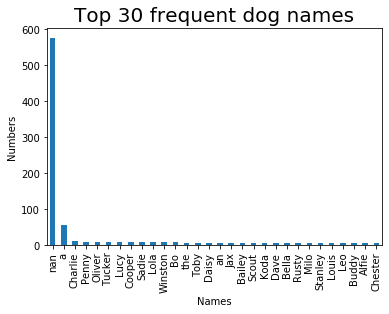

In [302]:
#Check most frequent dogs names
plt.title('Top 30 frequent dog names', size=20)
plt.xlabel('Names')
plt.ylabel('Numbers')
plt.savefig('frequent_dogs_names');

archive_clean['name'].value_counts()[0:30].sort_values(ascending=False).plot(kind = 'bar')

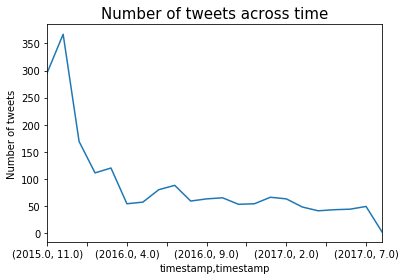

In [145]:
#visualize tweet count trend 
plt.title('Number of tweets across time', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of tweets')
plt.savefig('tweets_over_time');

tweets_stat_fin['tweet_id'].groupby([archive_clean['timestamp'].dt.year, archive_clean['timestamp'].dt.month]).count().plot(kind='line')

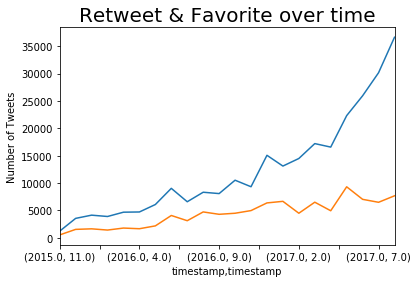

In [311]:
#visualize retweet & favorite count over time
plt.title('Retweet & Favorite over time', size =20)
plt.ylabel('Number of Tweets')
plt.xlabel('Time (Year,Month)')
#plt.legend('Retweet Count', 'Favorite Count')
plt.savefig('Retweet_Favorite')

tweets_clean.favorite_count.groupby([archive_clean['timestamp'].dt.year, archive_clean['timestamp'].dt.month]).mean().plot(kind='line')
tweets_clean.retweet_count.groupby([archive_clean['timestamp'].dt.year, archive_clean['timestamp'].dt.month]).mean().plot(kind='line')


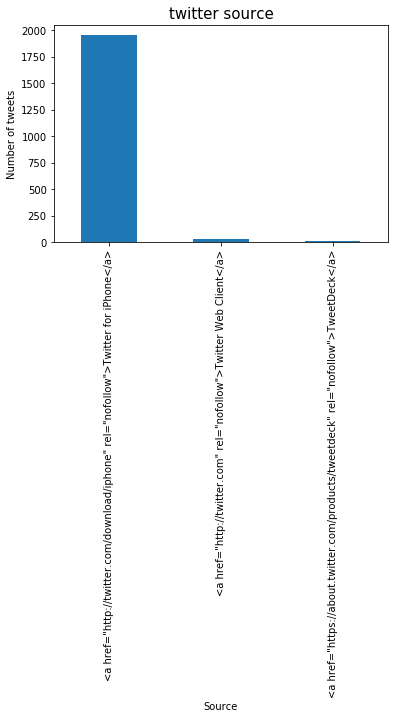

In [148]:
#visualize source trend
plt.title('twitter source', size=15)
plt.xlabel('Source')
plt.ylabel('Number of tweets')
plt.savefig('tweets_source')
tweets_stat_fin['source_x'].value_counts().plot(kind='bar')

In [149]:
tweets_stat_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 51 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id_x          1992 non-null float64
in_reply_to_user_id_x            1992 non-null float64
timestamp                        1992 non-null datetime64[ns, UTC]
source_x                         1992 non-null object
text                             1992 non-null object
rating_numerator                 1992 non-null float64
rating_denominator               1992 non-null float64
name                             1448 non-null object
dog_classification               306 non-null category
jpg_url                          2075 non-null object
img_num                          2075 non-null float64
prediction1                      2075 non-null object
prediction1_confidence           2075 non-null float64
p1_dog                           2075 non-null object
prediction1                      2075 non-null object
predictio

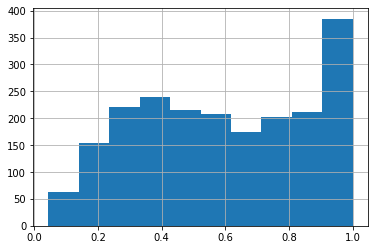

In [150]:
#checking prediction1_confidence
tweets_stat_fin.prediction1_confidence.hist()

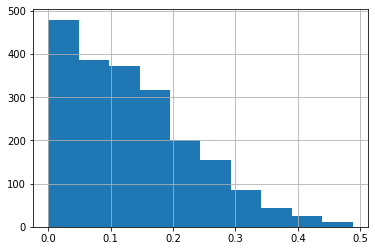

In [151]:
tweets_stat_fin.prediction2_confidence.hist()

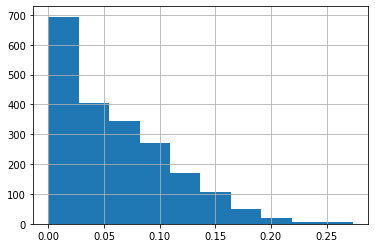

In [152]:
#checking prediction3_confidence
tweets_stat_fin.prediction3_confidence.hist()